In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import sqrt
from numpy import argsort, argmin, argpartition
from collections import Counter

In [2]:
data = load_digits()
features, label = data.data, data.target

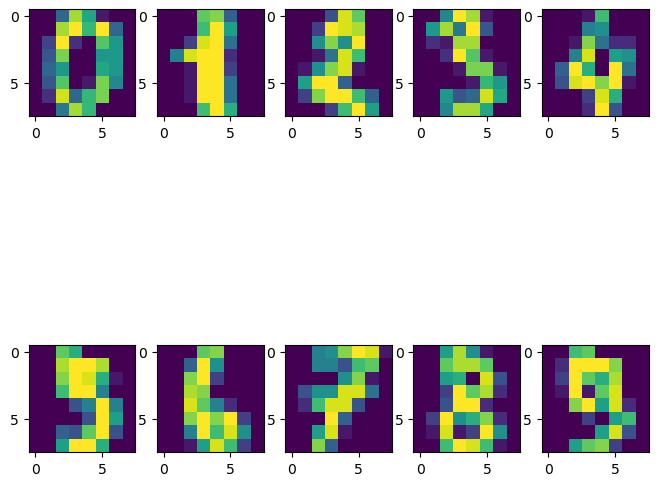

In [3]:
fig = plt.figure(figsize=(8, 8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    plt.imshow(features[i].reshape((8, 8)))
    
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)


In [5]:
class KNN():
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.x_train = X
        self.y_train = y

    def euclidean(self, x1, x2):
        distance = sqrt(sum((x1 - x2) ** 2))
        return distance
    
    def nearest_neighbors(self, test_sample):
        distances = [self.euclidean(test_sample, x) for x in self.x_train]

        k_indices = argpartition(distances, self.k)[:self.k]    # return indices of k minimum distances
        k_labels = [self.y_train[i] for i in k_indices]
        
        return k_labels
    
    def predict(self, x_test):
        predictions = []
        for row in x_test:
            y_of_neighbors = self.nearest_neighbors(row)
            most_common = Counter(y_of_neighbors).most_common(1)[0][0]
            predictions.append(most_common)
        return predictions
    
    def score(self, y_test, y_pred):
        return accuracy_score(y_test, y_pred)

In [6]:
knn = KNN(1)
knn.fit(x_train, y_train)
y_pred_1 = knn.predict(x_test)
knn.score(y_test, y_pred_1)

0.9888888888888889

In [8]:
knn = KNN(5)
knn.fit(x_train, y_train)
y_pred_3 = knn.predict(x_test)
knn.score(y_test, y_pred_3)

0.9833333333333333